<a href="https://colab.research.google.com/github/TiciaLeal/BigData/blob/main/Laboratorio1_VentasMensuales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laboratorio 1**

**Análisis de Datos de Ventas Mensuales**

Grupo 30:

• Aniñir Lionel

• Leal Patricia Guillermina

• Weinzettel Eduardo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar las librerias que voy a necesitar.

import os
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
ruta_de_acceso = '/content/drive/MyDrive/Colab Notebooks/Big Data/Dataset laboratorio 1'
archivos = os.listdir(ruta_de_acceso)

dataframes = {}

for archivo in archivos:
    if archivo.endswith('.csv'):#Asegurarse de que se consideren archivos csv
        mes = archivo.split('_')[3].split('.')[0] # Obtener el nombre del mes sin la extensión
        ruta_completa = os.path.join(ruta_de_acceso, archivo) # Ruta de acceso completa
        df = pd.read_csv(ruta_completa) # Cargar el csv en un Dataframe
        df_ventas = df.copy() # Hago una copia

        # Transformo todos los valores no numéricos en NaN en las columnas Cantidad Pedida y Precio Unitario
        df_ventas['Cantidad Pedida'] = pd.to_numeric(df_ventas['Cantidad Pedida'], errors='coerce') #El errors= 'coerce' transforma los valores no numericos a NaN'
        df_ventas['Precio Unitario'] = pd.to_numeric(df_ventas['Precio Unitario'], errors='coerce')

        # Elimino todos los NaN y me quedo solo con los valores numéricos
        df_ventas = df_ventas.loc[~df_ventas['Cantidad Pedida'].isna()]
        df_ventas = df_ventas.loc[~df_ventas['Precio Unitario'].isna()]
        df_ventas = df_ventas.dropna()

        # Transformo todos los valores numéricos al tipo de dato int
        df_ventas['Cantidad Pedida'] = df_ventas['Cantidad Pedida'].astype(int)
        df_ventas['Precio Unitario'] = df_ventas['Precio Unitario'].astype(float)

        dataframes[mes] = df_ventas

dataframes['Diciembre'] #Cambio el mes que voy a utilizar


,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


1. Comportamiento de las ventas en los distintos meses:
● ¿Cómo variaron las ventas a lo largo de los diferentes meses?

In [ ]:
# Calcular unidades vendidas por mes
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

totales_ventas = []
nombres_meses = []
for mes in meses:
    dataframe_mes = dataframes[mes]

    total_ventas_mes = dataframe_mes['Cantidad Pedida'].sum()
    totales_ventas.append(total_ventas_mes)
    nombres_meses.append(mes)

# Crear un objeto figura para el gráfico de barras
fig_ventas = go.Figure()

fig_ventas.add_trace(go.Bar(
        x=nombres_meses,
        y=totales_ventas,
        name='Unidades Vendidas',
        marker=dict(color='light blue')
))

fig_ventas.update_layout(
    title='Unidades Vendidas por Mes',
    xaxis=dict(title='Meses'),
    yaxis=dict(title='Unidades Vendidas')
)

fig_ventas.show()

● ¿Hubo algún mes que se destacó en términos de ventas?

In [ ]:
# Identificar el mes con las ventas más altas
mes_max_ventas = nombres_meses[totales_ventas.index(max(totales_ventas))]
ventas_maximas = max(totales_ventas)

print(f"El mes que se destacó por sus altas ventas es {mes_max_ventas} con {ventas_maximas} unidades vendidas.")

El mes que se destacó por sus altas ventas es Diciembre con 28121 unidades vendidas.


● ¿Cuál es el ingreso total generado por mes?

In [ ]:
# Cálculo de las ventas totales
df_ventas['Ingresos Totales'] = df_ventas['Precio Unitario'] * df_ventas['Cantidad Pedida']
df_ingresos = df_ventas
df_ingresos

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Ingresos Totales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",99.99
...,...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001",5.98
17657,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301",11.95
17658,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215",14.95
17659,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215",2.99


In [ ]:
# Crear un objeto figura para el segundo gráfico de barras
fig2 = go.Figure()

fig2.add_trace(go.Bar(
        x=nombres_meses,
        y=ingresos_totales,
        name='Ingresos Totales',
        marker=dict(color='green')
))

fig2.update_layout(
    title='Ingresos Totales por Mes',
    xaxis=dict(title='Meses'),
    yaxis=dict(title='Ingresos Totales')
)

fig2.show()

2. Optimización de la publicidad y patrón de ventas por hora:

● ¿Cuál es el momento ideal del día para presentar la publicidad y aumentar la
probabilidad de compra?

In [ ]:
# Crear listas para almacenar los totales de ventas por hora y las horas del día
totales_ventas_por_hora = []  # Lista para almacenar los totales de ventas por hora
horas_del_dia = list(range(24))  # Lista con las 24 horas del día

# Recorrer cada hora del día
for hora in horas_del_dia:
    # Calcular el total de ventas para la hora actual
    ventas_por_hora = 0
    for mes in meses:
        dataframe_mes = dataframes[mes]
        dataframe_mes = extraer_datos(dataframe_mes)
        ventas_hora_actual = dataframe_mes[dataframe_mes['Hora'] == hora]['Cantidad Pedida'].sum()
        ventas_por_hora += ventas_hora_actual

    # Agregar el total de ventas por hora a la lista
    totales_ventas_por_hora.append(ventas_por_hora)

# Encontrar la hora con las ventas más altas
hora_max_ventas = horas_del_dia[totales_ventas_por_hora.index(max(totales_ventas_por_hora))]
ventas_maximas_hora = max(totales_ventas_por_hora)

print(f"El momento ideal del día para presentar la publicidad y aumentar la probabilidad de compra es a las {hora_max_ventas} horas, con un total de {ventas_maximas_hora} unidades vendidas.")

El momento ideal del día para presentar la publicidad y aumentar la probabilidad de compra es a las 19 horas, con un total de 14470 unidades vendidas.


● ¿Cómo cambian los patrones de ventas por hora a lo largo del año?

In [ ]:
# Crear listas para almacenar los totales de ventas por hora y las horas del día
totales_ventas_por_hora = []  # Lista para almacenar los totales de ventas por hora
horas_del_dia = list(range(24))  # Lista con las 24 horas del día

# Recorrer cada hora del día
for hora in horas_del_dia:
    # Calcular el total de ventas para la hora actual
    ventas_por_hora = 0
    for mes in meses:
        dataframe_mes = dataframes[mes]
        dataframe_mes = extraer_datos(dataframe_mes)
        ventas_hora_actual = dataframe_mes[dataframe_mes['Hora'] == hora]['Cantidad Pedida'].sum()
        ventas_por_hora += ventas_hora_actual

    # Agregar el total de ventas por hora a la lista
    totales_ventas_por_hora.append(ventas_por_hora)

# Encontrar la hora con las ventas más altas
hora_max_ventas = horas_del_dia[totales_ventas_por_hora.index(max(totales_ventas_por_hora))]
ventas_maximas_hora = max(totales_ventas_por_hora)

print(f"El momento ideal del día para presentar la publicidad y aumentar la probabilidad de compra es a las {hora_max_ventas} horas, con un total de {ventas_maximas_hora} unidades vendidas.")

# Crear un objeto figura para el gráfico de barras
fig = go.Figure()

fig.add_trace(go.Bar(
        x=horas_del_dia,
        y=totales_ventas_por_hora,
        name='Unidades Vendidas por Hora',
        marker=dict(color='orange')
))

fig.update_layout(
    title='Unidades Vendidas por Hora a lo largo del año',
    xaxis=dict(title='Hora del Día'),
    yaxis=dict(title='Unidades Vendidas')
)

fig.show()

El momento ideal del día para presentar la publicidad y aumentar la probabilidad de compra es a las 19 horas, con un total de 14470 unidades vendidas.


● ¿Hay modificaciones en los patrones de ventas durante las horas de mayor actividad
en los distintos meses?

In [ ]:
# Crear una lista para almacenar los meses de mayor actividad
meses_mayor_actividad = []

# Crear listas para almacenar los totales de ventas por hora para los meses de mayor actividad
totales_ventas_por_hora_mayor_actividad = []

# Recorrer cada mes
for mes in meses:
    # Obtener el DataFrame para el mes actual
    dataframe_mes = dataframes[mes]
    dataframe_mes = extraer_datos(dataframe_mes)

    # Calcular el total de ventas por hora para el mes actual
    totales_ventas_por_hora = []
    for hora in horas_del_dia:
        ventas_hora_actual = dataframe_mes[dataframe_mes['Hora'] == hora]['Cantidad Pedida'].sum()
        totales_ventas_por_hora.append(ventas_hora_actual)

    # Encontrar la hora con las ventas más altas para el mes actual
    hora_max_ventas = horas_del_dia[totales_ventas_por_hora.index(max(totales_ventas_por_hora))]
    ventas_maximas_hora = max(totales_ventas_por_hora)

    # Verificar si este mes tiene mayor actividad en ventas (por ejemplo, si supera un umbral)
    umbral_actividad = 1000  # Define un umbral de actividad según tus datos reales
    if ventas_maximas_hora > umbral_actividad:
        meses_mayor_actividad.append(mes)
        totales_ventas_por_hora_mayor_actividad.append(totales_ventas_por_hora)

# Crear un objeto figura para el gráfico de líneas
fig = go.Figure()

# Agregar un trazo para cada mes de mayor actividad
for i, mes in enumerate(meses_mayor_actividad):
    fig.add_trace(go.Scatter(
        x=horas_del_dia,
        y=totales_ventas_por_hora_mayor_actividad[i],
        mode='lines',
        name=mes,
        line=dict(width=2)
    ))

fig.update_layout(
    title='Patrones de Ventas por Hora en Meses de Mayor Actividad',
    xaxis=dict(title='Hora del Día'),
    yaxis=dict(title='Unidades Vendidas'),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

fig.show()

 3. Distribución de ventas por ubicación:
* ¿En qué ciudades se han registrado las mayores ventas?
* ¿Cómo se comparan las ventas en diferentes estados o regiones?
* ¿Existe variación en las ventas por estado a lo largo de los meses?

In [ ]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crear una figura y ejes para el gráfico
# fig, ax = plt.subplots(figsize=(10, 6))


for mes in meses:

# Fragmento de código para desglosar y concatenar la dirección de envío
# 1. Dividir la columna 'Dirección de Envío' en 'Calle', 'Ciudad' y 'PO BOX'
  dataframe_mes_con_direccion = dataframes[mes]['Dirección de Envio'].str.split(', ', expand=True)
  dataframe_mes_con_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']

# 2. Separar 'PO BOX' en 'Estado' y 'Código Postal'
  dataframe_mes_con_direccion[['Estado', 'Cod Postal']] = dataframe_mes_con_direccion['PO BOX'].str.split(' ', expand=True)

# 3. Concatenar los componentes de dirección con el DataFrame original
  dataframe_mes_desglosado = pd.concat([dataframes[mes], dataframe_mes_con_direccion], axis=1)


#dataframe_mes_desglosado

# Agrupo el dataframe_mes_desglosado_AgrupadoPor_Estado por estado y sumo la cantidad de productos vendidos
  dataframe_mes_desglosado_AgrupadoPor_Estado = dataframe_mes_desglosado.groupby('Estado')['Cantidad Pedida'].sum()

# Reseteo el índice del resultado del grupo y conservo el resultado en ventas_por_estado
  dataframe_mes_desglosado_AgrupadoPor_Estado = dataframe_mes_desglosado_AgrupadoPor_Estado.reset_index(inplace=False)

#  plt.figure(figsize=(10, 6))  # Tamaño del gráfico
#  plt.bar(dataframe_mes_desglosado_AgrupadoPor_Estado["Estado"], dataframe_mes_desglosado_AgrupadoPor_Estado["Cantidad Pedida"], color='skyblue')  # Crear el gráfico de barras
#  plt.xlabel('Estado')  # Etiqueta del eje x
#  plt.ylabel('Cantidad Pedida')  # Etiqueta del eje y
#  plt.title('Cantidad Pedida por Estado')  # Título del gráfico
#  plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
#plt.tight_layout()  # Ajustar el diseño para evitar recortes
#plt.show()


dataframe_mes_desglosado

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Hora,Dia,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",0,30,136 Church St,New York City,NY 10001,NY,10001
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",7,29,562 2nd St,New York City,NY 10001,NY,10001
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",18,12,277 Main St,New York City,NY 10001,NY,10001
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",15,22,410 6th St,San Francisco,CA 94016,CA,94016
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,18,43 Hill St,Atlanta,GA 30301,GA,30301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",20,11,14 Madison St,San Francisco,CA 94016,CA,94016
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,1,549 Willow St,Los Angeles,CA 90001,CA,90001
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",6,9,273 Wilson St,Seattle,WA 98101,WA,98101
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",10,3,778 River St,Dallas,TX 75001,TX,75001


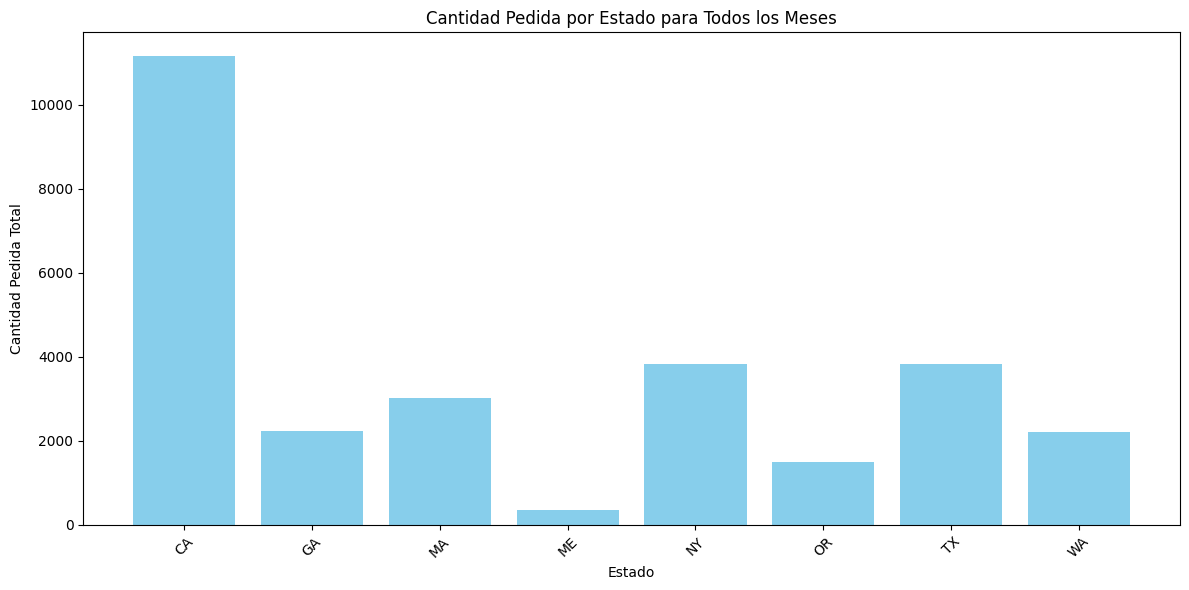

In [ ]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt  # Para crear gráficos
import pandas as pd  # Para trabajar con DataFrames

# Lista de meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Crear una lista para almacenar los DataFrames de cada mes
dataframes_meses = []

# Iterar a través de los meses
for mes in meses:
    # Procesar cada mes y calcular la suma de la columna 'Cantidad Pedida'

    # 1. Dividir la columna 'Dirección de Envío' en componentes de dirección
    dataframe_mes_con_direccion = dataframes[mes]['Dirección de Envio'].str.split(', ', expand=True)
    dataframe_mes_con_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']

    # 2. Separar 'PO BOX' en 'Estado' y 'Código Postal'
    dataframe_mes_con_direccion[['Estado', 'Cod Postal']] = dataframe_mes_con_direccion['PO BOX'].str.split(' ', expand=True)

    # 3. Concatenar los componentes de dirección con el DataFrame original
    dataframe_mes_desglosado = pd.concat([dataframes[mes], dataframe_mes_con_direccion], axis=1)

    # 4. Agrupar por 'Estado' y calcular la suma de 'Cantidad Pedida'
    dataframe_mes_desglosado_AgrupadoPor_Estado = dataframe_mes_desglosado.groupby('Estado')['Cantidad Pedida'].sum().reset_index(inplace=False)

    # Almacenar el DataFrame resultante en la lista
    dataframes_meses.append(dataframe_mes_desglosado_AgrupadoPor_Estado)

# Concatenar los DataFrames de cada mes en uno solo
df_total = pd.concat(dataframes_meses)

# Crear el gráfico de barras
plt.bar(df_total["Estado"], df_total["Cantidad Pedida"], color='skyblue')

# Configurar etiquetas y título del gráfico
plt.xlabel('Estado')
plt.ylabel('Cantidad Pedida Total')
plt.title('Cantidad Pedida por Estado para Todos los Meses')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Ajustar el diseño del gráfico para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

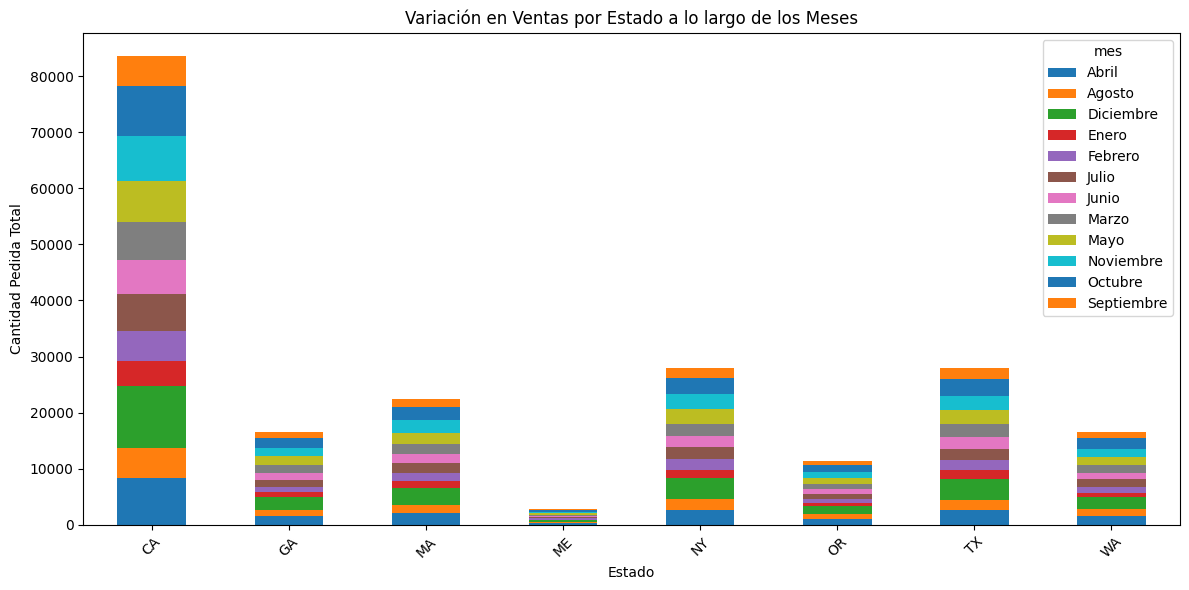

In [ ]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt  # Para crear gráficos
import pandas as pd  # Para trabajar con DataFrames

# Lista de meses que se utilizarán para el análisis
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crear una lista para almacenar los DataFrames de cada mes
dataframes_meses = []

# Iterar a través de los meses
for mes in meses:
    # Procesar cada mes y calcular la suma de la columna 'Cantidad Pedida'

    # 1. Dividir la columna 'Dirección de Envío' en componentes de dirección
    dataframe_mes_con_direccion = dataframes[mes]['Dirección de Envio'].str.split(', ', expand=True)
    dataframe_mes_con_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']

    # 2. Separar 'PO BOX' en 'Estado' y 'Código Postal'
    dataframe_mes_con_direccion[['Estado', 'Cod Postal']] = dataframe_mes_con_direccion['PO BOX'].str.split(' ', expand=True)

    # 3. Concatenar los componentes de dirección con el DataFrame original
    dataframe_mes_desglosado = pd.concat([dataframes[mes], dataframe_mes_con_direccion], axis=1)

    # 4. Agrupar por 'Estado' y calcular la suma de 'Cantidad Pedida'
    dataframe_mes_desglosado_AgrupadoPor_Estado = dataframe_mes_desglosado.groupby('Estado')['Cantidad Pedida'].sum().reset_index(inplace=False)

    # 5. Agregar una columna 'mes' para identificar el mes correspondiente
    dataframe_mes_desglosado_AgrupadoPor_Estado['mes'] = mes

    # Almacenar los datos de cada mes en el DataFrame de meses
    dataframes_meses.append(dataframe_mes_desglosado_AgrupadoPor_Estado)

# Concatenar los DataFrames de cada mes en uno solo
df_total = pd.concat(dataframes_meses)

# Crear un DataFrame pivote para el gráfico apilado
df_pivot = df_total.pivot(index='Estado', columns='mes', values='Cantidad Pedida').fillna(0)

# Crear el gráfico de barras apilado
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

# Configurar etiquetas y título del gráfico
plt.xlabel('Estado')
plt.ylabel('Cantidad Pedida Total')
plt.title('Variación en Ventas por Estado a lo largo de los Meses')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Ajustar el diseño del gráfico para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crear un DataFrame para almacenar los datos de todos los meses
dataframes_meses = []

for mes in meses:
    # Tu código para procesar cada mes y calcular la suma de Cantidad Pedida
    dataframe_mes_con_direccion = dataframes[mes]['Dirección de Envio'].str.split(', ', expand=True)
    dataframe_mes_con_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
    dataframe_mes_con_direccion[['Estado', 'Cod Postal']] = dataframe_mes_con_direccion['PO BOX'].str.split(' ', expand=True)
    dataframe_mes_desglosado = pd.concat([dataframes[mes], dataframe_mes_con_direccion], axis=1)
    dataframe_mes_desglosado_AgrupadoPor_Estado = dataframe_mes_desglosado.groupby('Estado')['Cantidad Pedida'].sum().reset_index(inplace=False)
    dataframe_mes_desglosado_AgrupadoPor_Estado['mes'] = mes  # Agregar columna 'mes' para identificar el mes

    # Almacenar los datos de cada mes en el DataFrame de meses
    dataframes_meses.append(dataframe_mes_desglosado_AgrupadoPor_Estado)

# Concatenar los DataFrames de cada mes en uno solo
df_total = pd.concat(dataframes_meses)

# Crear el gráfico de líneas
fig = px.line(df_total, x='mes', y='Cantidad Pedida', color='Estado', title='Variación en Ventas por Estado a lo largo de los Meses')

# Mostrar el gráfico
fig.show()

In [ ]:
df_total

,Estado,Cantidad Pedida,mes
0,CA,4364,Enero
1,GA,877,Enero
2,MA,1171,Enero
3,ME,138,Enero
4,NY,1497,Enero
...,...,...,...
3,ME,352,Diciembre
4,NY,3828,Diciembre
5,OR,1507,Diciembre
6,TX,3820,Diciembre


4. Análisis del producto más vendido:

 ● ¿Cuál es el producto más vendido en general y en cada mes?

 ● ¿Qué factores crees que han contribuido al éxito de ese producto en particular?

In [ ]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
        'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crear un DataFrame para almacenar los datos de todos los meses
dataframe_mes_desglosado_todo_el_anio = pd.DataFrame()  # Inicializa un DataFrame vacío

#Creo el objeto figura
fig = go.Figure()

for mes in meses:
    # Tu código para procesar cada mes y calcular la suma de Cantidad Pedida y el promedio de Precio Unitario
    dataframe_mes_con_direccion = dataframes[mes]['Dirección de Envio'].str.split(', ', expand=True)
    dataframe_mes_con_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
    dataframe_mes_con_direccion[['Estado', 'Cod Postal']] = dataframe_mes_con_direccion['PO BOX'].str.split(' ', expand=True)
    dataframe_mes_desglosado_mes = pd.concat([dataframes[mes], dataframe_mes_con_direccion], axis=1)
    dataframe_mes_desglosado_mes = dataframe_mes_desglosado_mes.groupby('Producto').agg({
        'Cantidad Pedida': 'sum',
        'Precio Unitario': 'mean'
    })
    dataframe_mes_desglosado_mes['Mes'] = mes  # Agregar el mes como una columna
    dataframe_mes_desglosado_todo_el_anio = pd.concat([dataframe_mes_desglosado_todo_el_anio, dataframe_mes_desglosado_mes])

  # Ahora tienes un DataFrame completo con los datos de todos los meses

  # Realizar el análisis de productos
    Analisis_de_productos_mas_vendido_Anio = dataframe_mes_desglosado_todo_el_anio.groupby('Producto').agg({
    'Cantidad Pedida': 'sum',       # Suma de la cantidad pedida para cada producto.
    'Precio Unitario': 'mean'       # Cálculo del promedio del precio unitario para cada producto.
    })

# Ordenar los productos de mayor a menor según la cantidad pedida.
Analisis_de_productos_mas_vendido_Anio = Analisis_de_productos_mas_vendido_Anio.sort_values(by='Cantidad Pedida', ascending=False)

# Resetea el índice del DataFrame 'Analisis_de_productos' para que los índices sean secuenciales.
Analisis_de_productos_mas_vendido_Anio = Analisis_de_productos_mas_vendido_Anio.reset_index()

# Ahora puedes continuar con tu análisis de productos

Analisis_de_productos_mas_vendido_Anio

#dataframe_mes_desglosado


,Producto,Cantidad Pedida,Precio Unitario
0,AAA Batteries (4-pack),31017,2.99
1,AA Batteries (4-pack),27635,3.84
2,USB-C Charging Cable,23975,11.95
3,Lightning Charging Cable,23217,14.95
4,Wired Headphones,20557,11.99
5,Apple Airpods Headphones,15661,150.00
6,Bose SoundSport Headphones,13457,99.99
7,27in FHD Monitor,7550,149.99
8,iPhone,6849,700.00
9,27in 4K Gaming Monitor,6244,389.99


In [ ]:
# Resetea el índice del DataFrame 'Analisis_de_productos' para que los índices sean secuenciales.
dataframe_mes_desglosado_todo_el_anio = dataframe_mes_desglosado_todo_el_anio.reset_index()


dataframe_mes_desglosado_todo_el_anio

,Producto,Cantidad Pedida,Precio Unitario,Mes
0,20in Monitor,215,109.99,Enero
1,27in 4K Gaming Monitor,312,389.99,Enero
2,27in FHD Monitor,419,149.99,Enero
3,34in Ultrawide Monitor,314,379.99,Enero
4,AA Batteries (4-pack),1425,3.84,Enero
...,...,...,...,...
223,ThinkPad Laptop,541,999.99,Diciembre
224,USB-C Charging Cable,3251,11.95,Diciembre
225,Vareebadd Phone,285,400.00,Diciembre
226,Wired Headphones,2748,11.99,Diciembre


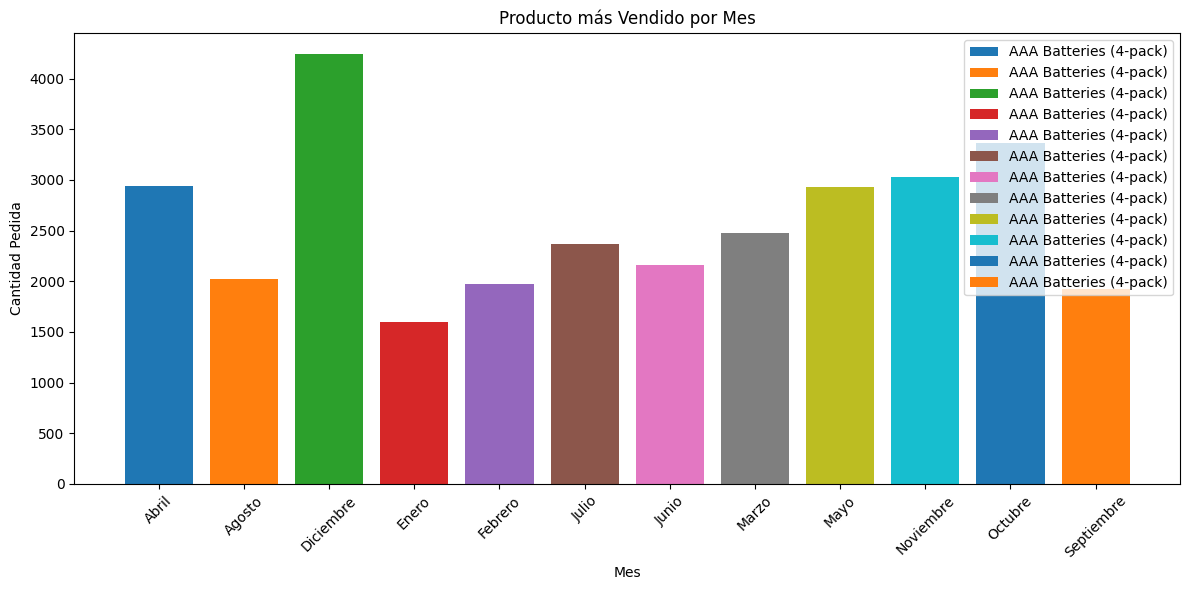

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Encuentra el producto más vendido por mes
dataframe_mes_desglosado_todo_el_anio = dataframe_mes_desglosado_todo_el_anio.groupby(['Mes', 'Producto'])['Cantidad Pedida'].sum().reset_index()
indices_productos_maximos = dataframe_mes_desglosado_todo_el_anio.groupby('Mes')['Cantidad Pedida'].idxmax()
productos_mas_vendidos = dataframe_mes_desglosado_todo_el_anio.loc[indices_productos_maximos]

# Crea un gráfico de barras apiladas para mostrar el producto más vendido por mes
plt.figure(figsize=(12, 6))
for mes in dataframe_mes_desglosado_todo_el_anio['Mes'].unique():
    producto_mes = productos_mas_vendidos[productos_mas_vendidos['Mes'] == mes]
    plt.bar(mes, producto_mes['Cantidad Pedida'], label=producto_mes['Producto'].values[0])

# Configura etiquetas y título del gráfico
plt.xlabel('Mes')
plt.ylabel('Cantidad Pedida')
plt.title('Producto más Vendido por Mes')
plt.legend()

# Muestra el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Importa la biblioteca Plotly Express como 'px'
import plotly.express as px

# Crea un gráfico de cloropletas
fig = px.choropleth(dataframe_mes_desglosado_AgrupadoPor_Estado,  # DataFrame de datos
                    locations='Estado',  # Columna que contiene los nombres de los estados
                    locationmode='USA-states',  # Modo de ubicación para estados de EE. UU.
                    color='Cantidad Pedida',  # Columna que determina la escala de color
                    color_continuous_scale="RdYlGn",  # Escala de colores
                    scope="usa",  # Alcance geográfico: solo Estados Unidos
                    title='Ventas por estado'  # Título del gráfico
                   )

# Muestra el gráfico
fig.show()

In [ ]:
dataframe_mes_desglosado_todo_el_anio

,Mes,Producto,Cantidad Pedida
0,Abril,20in Monitor,395
1,Abril,27in 4K Gaming Monitor,565
2,Abril,27in FHD Monitor,737
3,Abril,34in Ultrawide Monitor,653
4,Abril,AA Batteries (4-pack),2822
...,...,...,...
223,Septiembre,ThinkPad Laptop,249
224,Septiembre,USB-C Charging Cable,1594
225,Septiembre,Vareebadd Phone,126
226,Septiembre,Wired Headphones,1302


In [ ]:
dataframe_mes_desglosado

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Hora,Dia,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",0,30,136 Church St,New York City,NY 10001,NY,10001
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",7,29,562 2nd St,New York City,NY 10001,NY,10001
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",18,12,277 Main St,New York City,NY 10001,NY,10001
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",15,22,410 6th St,San Francisco,CA 94016,CA,94016
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,18,43 Hill St,Atlanta,GA 30301,GA,30301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",20,11,14 Madison St,San Francisco,CA 94016,CA,94016
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,1,549 Willow St,Los Angeles,CA 90001,CA,90001
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",6,9,273 Wilson St,Seattle,WA 98101,WA,98101
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",10,3,778 River St,Dallas,TX 75001,TX,75001


In [ ]:
# Crear listas para almacenar los totales de ventas y los nombres de los meses
totales_ventas = []  # Lista para almacenar los totales de ventas
nombres_meses = []   # Lista para almacenar los nombres de los meses

dataframes_todo_desglozado = {}

# La lista 'meses' contiene los nombres de los meses en español.
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Itera sobre cada mes en la lista 'meses'.
for mes in meses:
    # Accede a los DataFrames almacenados en 'dataframes' correspondientes a cada mes.
    # 'dataframe_mes' contendrá el DataFrame correspondiente al mes actual en cada iteración.
    dataframe_mes = dataframes[mes]

    # A partir de este punto, se puede trabajar con el DataFrame específico correspondiente a cada mes.

def extraer_datos(datos):
    """
    Esta función toma un DataFrame de Pandas 'datos' y realiza las siguientes operaciones:

    1. Convierte la columna 'Fecha de Pedido' en un objeto datetime.
    2. Extrae la hora del día de la columna 'Fecha de Pedido' y la agrega como una nueva columna 'Hora'.
    3. Extrae el día del mes de la columna 'Fecha de Pedido' y la agrega como una nueva columna 'Dia'.

    Args:
    datos (DataFrame): El DataFrame que contiene los datos de ventas.

    Returns:
    DataFrame: El DataFrame 'datos' con las columnas 'Fecha de Pedido', 'Hora' y 'Dia' modificadas o agregadas.
    """

    # Convierte la columna 'Fecha de Pedido' en un objeto datetime
    datos['Fecha de Pedido'] = pd.to_datetime(datos['Fecha de Pedido'])

    # Extrae la hora del día de la columna 'Fecha de Pedido' y la agrega como una nueva columna 'Hora'
    datos['Hora'] = datos['Fecha de Pedido'].dt.hour

    # Extrae el día del mes de la columna 'Fecha de Pedido' y la agrega como una nueva columna 'Dia'
    datos['Dia'] = datos['Fecha de Pedido'].dt.day

    return datos


# Ejemplo de uso de la función 'extraer_datos'
# dataframe_mes = extraer_datos(dataframe_mes)

# Recorrer una lista llamada 'meses' (se asume que esta lista está definida en otro lugar en el código)
for mes in meses:
    # Suponemos que 'dataframes' es un diccionario que contiene los datos de ventas por mes
    dataframe_mes = dataframes[mes]

    # Suponemos que hay una función llamada 'extraer_datos' que procesa el DataFrame 'dataframe_mes'
    dataframe_mes = extraer_datos(dataframe_mes)

    # 1. Dividir la columna 'Dirección de Envío' en 'Calle', 'Ciudad' y 'PO BOX'
    dataframe_mes_con_direccion = dataframes[mes]['Dirección de Envio'].str.split(', ', expand=True)
    dataframe_mes_con_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']

    # 2. Separar 'PO BOX' en 'Estado' y 'Código Postal'
    dataframe_mes_con_direccion[['Estado', 'Cod Postal']] = dataframe_mes_con_direccion['PO BOX'].str.split(' ', expand=True)

    # 3. Concatenar los componentes de dirección con el DataFrame original
    dataframe_mes_desglosado = pd.concat([dataframes[mes], dataframe_mes_con_direccion], axis=1)

    dataframes_todo_desglozado[mes] = dataframe_mes_desglosado


# (MUESTRA TODO EL DATAFRAMA DE UN MES EN ESTE CASO DICIEMBRE PORQUE ES EL ULTIMO MES DEL AñO Y FUE EL ULTIMO DEL CICLO FOR)
#  dataframe_mes_desglosado
dataframes_todo_desglozado['Agosto']

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Hora,Dia,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",22,31,359 Spruce St,Seattle,WA 98101,WA,98101
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",15,15,492 Ridge St,Dallas,TX 75001,TX,75001
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",14,6,149 7th St,Portland,OR 97035,OR,97035
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",20,29,631 2nd St,Los Angeles,CA 90001,CA,90001
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",19,15,736 14th St,New York City,NY 10001,NY,10001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,2019-08-29 22:19:00,"868 Hickory St, San Francisco, CA 94016",22,29,868 Hickory St,San Francisco,CA 94016,CA,94016
12007,248147,AAA Batteries (4-pack),3,2.99,2019-08-31 16:26:00,"206 Lakeview St, Boston, MA 02215",16,31,206 Lakeview St,Boston,MA 02215,MA,02215
12008,248148,AA Batteries (4-pack),1,3.84,2019-08-02 07:25:00,"568 13th St, Seattle, WA 98101",7,2,568 13th St,Seattle,WA 98101,WA,98101
12009,248149,USB-C Charging Cable,1,11.95,2019-08-08 12:10:00,"495 Walnut St, San Francisco, CA 94016",12,8,495 Walnut St,San Francisco,CA 94016,CA,94016


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Supongamos que tienes un diccionario 'dataframes_todo_desglozado' que contiene DataFrames para cada mes
# dataframes_todo_desglozado = {'Enero': df_enero, 'Febrero': df_febrero, ...}

# La lista 'meses' contiene los nombres de los meses en español.
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

for mes in meses:
    # Acceso al DataFrame correspondiente al mes actual
    df_mes = dataframes_todo_desglozado[mes]

    # Asegúrate de que 'Día' sea de tipo numérico (puede ser necesario convertirlo)
    df_mes['Dia'] = pd.to_numeric(df_mes['Dia'], errors='coerce')

    # Agrupa los datos por 'Día' y suma la cantidad pedida en cada día
    df_agregado = df_mes.groupby('Dia')['Cantidad Pedida'].sum().reset_index()

    # Crear el gráfico de barras con plotly.graph_objects
    fig = go.Figure(data=[go.Bar(x=df_agregado['Dia'], y=df_agregado['Cantidad Pedida'], marker_color='skyblue')])

    # Personalizar el diseño del gráfico
    fig.update_layout(
        title=f'Cantidad Total Pedida para {mes}',
        xaxis_title='Día',
        yaxis_title='Cantidad Total Pedida',
        xaxis=dict(type='category'),  # Configura el eje x como una categoría
    )

    # Mostrar el gráfico
    fig.show()

In [ ]:
# Supongamos que tienes un diccionario 'dataframes_todo_desglozado' que contiene DataFrames para cada mes
# dataframes_todo_desglozado = {'Enero': df_enero, 'Febrero': df_febrero, ...}

# La lista 'meses' contiene los nombres de los meses en español.
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crear una figura de Plotly
fig = go.Figure()

# Iterar sobre cada mes
for mes in meses:
    # Obtener el DataFrame del mes actual
    df_mes = dataframes_todo_desglozado[mes]

    # Asegurarse de que 'Día' sea de tipo numérico
    df_mes['Dia'] = pd.to_numeric(df_mes['Dia'], errors='coerce')

    # Agrupar los datos por 'Día' y sumar la cantidad pedida en cada día
    df_agregado = df_mes.groupby('Dia')['Cantidad Pedida'].sum().reset_index()

    # Crear una barra para este mes en la figura
    fig.add_trace(go.Bar(
        x=df_agregado['Dia'],
        y=df_agregado['Cantidad Pedida'],
        name=mes,  # Nombre del mes para la leyenda
    ))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Cantidad Total Pedida por Día (Cada Mes en un Color Diferente)',
    xaxis_title='Día',
    yaxis_title='Cantidad Total Pedida',
    xaxis=dict(type='category'),  # Configurar el eje x como una categoría
)

# Mostrar el gráfico
fig.show()
